## Microsoft Movie Studio Analysis


### Overview
#### Microsoft wants to venture into the film industry. This project analysis will enable them make an informed decision based on the best performing film categories, profitability of the different movie genres both in the local(USA) and global markets as well as the ratings.

### Business Problem
#### Microsoft would like to expand their business niche due to the current trends where fellow big companies have been exploring and thriving on creating video content. They have created a new video studio but do not have the information to enable them make an informed decision on the kind of films to create, how to make profits, and generally how to set themselves apart in order to be the market leaders in this industry and remain relevant.

#### Data Understanding
##### I will be analyzing data from three movie websites: IMDB(Internet Movie Database), The MovieDB, The Numbers. The file im.db will be queried with SQLite. Lets dig in the data.

##### Load Libraries


In [92]:
import pandas as pd
import numpy as np
import sqlite3
#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### 1.Data Analysis
##### From bom.movie_gross.csv file

In [93]:
movie_gross = pd.read_csv('data\\bom.movie_gross.csv')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [94]:
#view the DataFrame first 5 rows
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [95]:
#view the DataFrame last 5 rows
movie_gross.tail()


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [96]:
#check the column names
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [97]:
#check the data information
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [98]:
#From the above cell, We have missing data in 3 of the columns.
"""
Studio, domestic_gross and foreign_gross.
"""

'\nStudio, domestic_gross and foreign_gross.\n'

In [99]:
#check the statistical descriptive analysis
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


#### 1.a Data Cleaning 
##### bom.movie_gross.csv

In [100]:
#check the sum of the null values.
movie_gross.isna().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [101]:
#we will drop the rows that are null for the column studio and domestic_gross since this will not affect our data.
movie_gross.dropna(subset=['studio'], inplace=True)
movie_gross.dropna(subset=['domestic_gross'], inplace=True)
movie_gross.isna().sum()


title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [102]:
#the % of missing values for the foreign_gross column is too high to consider dropping the row
#we can consider to change the data type to float from object then use the fillna method
# Replace 'None' strings with NaN
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].replace('None', pd.NA)

# Convert the 'foreign_gross' column to float, handling missing values
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

# Display the result
print(movie_gross['foreign_gross'])

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3356, dtype: float64


In [120]:
#there seems to be outliers in this column after first considering to use the measure of central tendancy
#to fill the null values. 
print(movie_gross['foreign_gross'].mean())
print(movie_gross['foreign_gross'].median())

75979668.67282717
19600000.0


In [122]:
#lets us drop the column and remain with the domestic gross as our statistical measure for this dataset.
cleaned_movie_gross = movie_gross.drop('foreign_gross', axis=1)

In [123]:
#change the year dtype from int to object
cleaned_movie_gross['year'] = cleaned_movie_gross['year'].astype(str)
cleaned_movie_gross

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [125]:
cleaned_movie_gross['studio'].value_counts()

studio
IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
TVC             1
E1              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 255, dtype: int64

##### Visualization
##### What is the distribution of movies by studio?


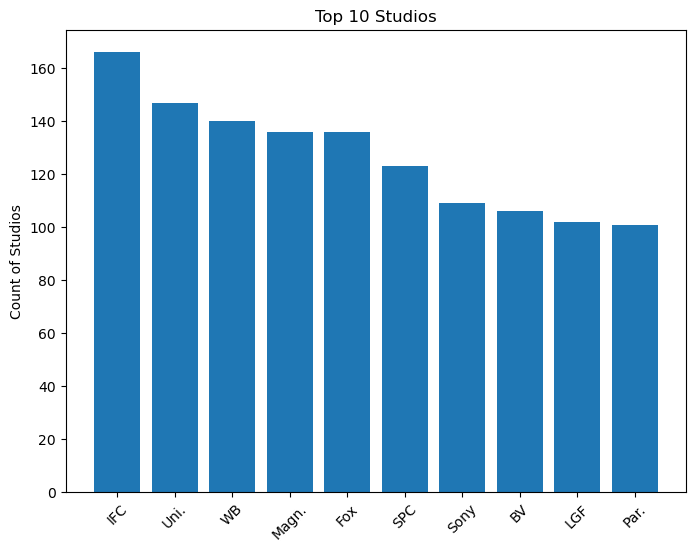

In [126]:
# Set up plots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create variables for easier reuse
value_counts = cleaned_movie_gross['studio'].value_counts()
top_10_counts = value_counts.iloc[:10]

# Plot data
ax1.bar(top_10_counts.index, top_10_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Studios")
ax1.set_title("Top 10 Studios");

In [133]:
cleaned_movie_gross['year'].value_counts().sort_values()

year
2018    308
2017    320
2010    322
2013    345
2014    390
2012    393
2011    396
2016    433
2015    449
Name: count, dtype: int64

#### Visualization
##### What is the count of movies per year

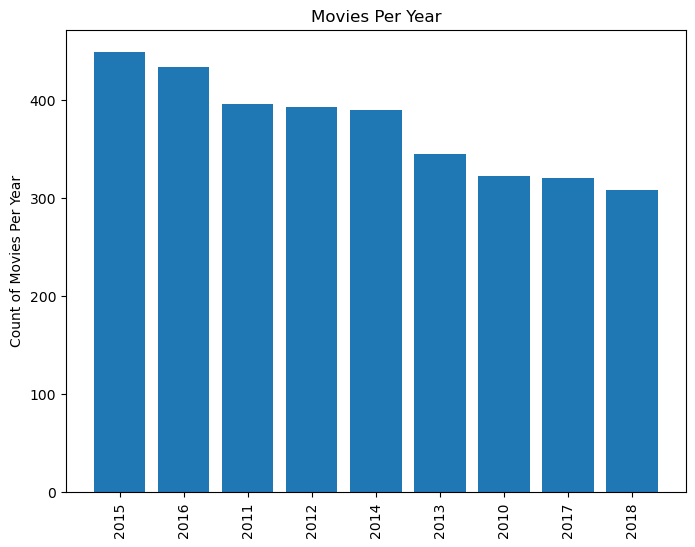

In [134]:
# Set up plots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create variables for easier reuse
value_counts = cleaned_movie_gross['year'].value_counts()
top_10_counts = value_counts.iloc[:10]

# Plot data
ax1.bar(top_10_counts.index, top_10_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Count of Movies Per Year")
ax1.set_title("Movies Per Year");

#### 2. Data Analysis
##### From rt.movie_info.tsv

In [107]:
movie_rating = pd.read_csv('data\\rt.movie_info.tsv', delimiter = '\t')
movie_rating


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [108]:
#to view the first 5 rows from the movie_rating dataset
movie_rating.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [109]:
#to view the last 5 elements of the dataset
movie_rating.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [110]:
#to check the columns
movie_rating.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [111]:
#to check the statistical data of the dataset
movie_rating.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [112]:
#to check the info on the dataset
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [113]:
#we have nulls in the 11 columns.
""" 
The only column that is not null is the ID column.
"""

' \nThe only column that is not null is the ID column.\n'